<a href="https://colab.research.google.com/github/Haanaahh/SMART-TRAVEL-RECOMMENDER-SYSTEM/blob/main/SMART_TRAVEL_RECOMMENDER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SMART TRAVEL RECOMMENDER**


#### **INTRODUCTION**

The travel industry today faces a challenge: while travelers are presented with vast options for destinations, accommodations, and experiences, personalized recommendations remain limited. This often results in information overload, where users struggle to find destinations that best match their interests, preferences, and past experiences. Current platforms offer generalized suggestions based on basic user input, but they lack the nuanced understanding of a user's unique tastes and preferences.

In response, the goal of this project is to develop a **Smart Travel Recommendation System** that leverages machine learning to offer personalized destination suggestions based on users' previous travel behavior, ratings, preferences, and other influencing factors. By utilizing data from user reviews, destination attributes, and other contextual information, the system will not only predict how likely a user is to rate a destination highly but also recommend travel options they are most likely to enjoy, enhancing the overall travel experience.

#### **PROJECT GOAL**

The goal of this project is to build a machine learning-powered recommendation system that can predict and recommend travel destinations based on user preferences and behaviors. The system will analyze users’ historical data (e.g., past travel destinations, ratings, preferences) to generate personalized recommendations for new destinations. This solution aims to provide a more personalized, efficient, and enjoyable way for travelers to discover new destinations suited to their tastes.

#### **PROBLEM STATEMENT**

Despite the growing amount of data available from users' travel history, preferences, and ratings, current travel platforms fail to provide personalized, data-driven recommendations. This leaves travelers with generalized suggestions that do not always match their interests. The challenge is to create a recommendation system that effectively analyzes users' preferences and predicts which destinations are most likely to appeal to them. Additionally, the system must be able to handle a wide variety of data points, such as user demographics, historical behavior, and textual reviews.

#### **DATA STORY**

The recommendation system in this project leverages a variety of data sources to build a comprehensive understanding of user preferences and destination characteristics. Key data points include:

1. **User Data**: This includes users' past travel destinations, ratings, and reviews. The system captures how users rate destinations they've visited, which helps predict preferences for new locations.
   
2. **Destination Data**: Each destination is associated with attributes such as geographical location, type (e.g., beach, mountains, city), and other features like tourist ratings, amenities, and reviews.

3. **User-Generated Content**: Reviews and feedback provided by users are crucial in determining the popularity and appeal of destinations.

The data is processed, cleaned, and transformed into a structured format that can be used by machine learning algorithms to make predictions.

#### **MODELS USED**

- **RANDOM FOREST**
- **GRADIENT BOOSTING**
- **SUPPORT VECTOR REGRESSION (SVR)**
- **K-NEAREST NEIGHBOURS(KNN)**
- **LINEAR REGRESSION**

#### **WHY THESE MODELS WERE USED**

- **RANDOM FOREST**: Random Forest is an ensemble learning method that builds multiple decision trees and merges them to improve accuracy. It’s particularly effective at handling large datasets and capturing complex relationships between features, making it a good choice for predicting user ratings and travel preferences.
  
- **GRADIENT BOOSTING**: This model improves predictive accuracy by building trees sequentially, where each new tree corrects the errors of the previous one. It’s ideal for refining recommendations, especially when focusing on harder-to-predict instances in user preferences.
  
- **SUPPORT VECTOR REGRESSION (SVR)**: SVR is suited for predicting continuous values, such as user ratings or preference scores. Its ability to model high-dimensional data makes it effective for predicting which destinations users are most likely to rate highly, based on past behavior and preferences.



In [ ]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, average_precision_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
import joblib
import nltk
import re
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV



In [ ]:
data = pd.read_csv('/content/booking_reviews copy.csv')
data

,review_title,reviewed_at,reviewed_by,images,crawled_at,url,hotel_name,hotel_url,avg_rating,nationality,rating,review_text,raw_review_text,tags,meta
0,Exceptional,11 July 2021,Kyrylo,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Poland,10.0,"Everything was perfect! Quite, cozy place to r...","<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...,"{'language': 'en-gb', 'source': 'https://www.b..."
1,I highly recommend this b&b! We enjoyed it a lot!,24 November 2019,Dimitri,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Belgium,9.0,Very friendly host and perfect breakfast!,"<p class=""review_pos ""><svg aria-label=""Positi...",Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...,"{'language': 'en-gb', 'source': 'https://www.b..."
2,Exceptional,3 January 2020,Virginia,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/hydro...,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,United Kingdom,10.0,It was just what we wanted for a week by the b...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~Couple~Apartment with Sea View~St...,"{'language': 'en-gb', 'source': 'https://www.b..."
3,My stay in the house was a experiencing bliss ...,8 September 2019,Kannan,NaN,"07/20/2021, 01:09:28",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Netherlands,10.0,My stay in the house was a experiencing bliss ...,"<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...,"{'language': 'en-gb', 'source': 'https://www.b..."
4,One bedroom apartment with wonderful view and ...,23 June 2019,Sue,https://cf.bstatic.com/xdata/images/xphoto/squ...,"07/20/2021, 01:09:28",https://www.booking.com/reviews/be/hotel/hydro...,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,South Africa,9.2,The building itself has a very musty smell in ...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~People with friends~Apartment wit...,"{'language': 'en-gb', 'source': 'https://www.b..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26381,Good stay,3 July 2019,Dragos,NaN,"07/20/2021, 02:15:51",https://www.booking.com/reviews/be/hotel/euro-...,Hotel Euro Capital Brussels,https://www.booking.com/hotel/be/euro-capital-...,7.7,Romania,8.8,"Had a room with the view to the main street, j...","<p class=""review_neg ""><svg aria-label=""Negati...",Business trip~Solo traveller~Double or Twin Ro...,"{'language': 'en-gb', 'source': 'https://www.b..."
26382,Exceptional,7 December 2018,Anonymous,NaN,"07/20/2021, 02:15:51",https://www.booking.com/reviews/be/hotel/glamp...,Glamping op het Zeugekot,https://www.booking.com/hotel/be/glamping-op-h...,8.6,United Kingdom,10.0,"There was nothing not to like. ,\n\nEverything...","<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~Family with young children~Tent~S...,"{'language': 'en-gb', 'source': 'https://www.b..."
26383,Good,15 September 2018,Zhl,NaN,"07/20/2021, 02:15:51",https://www.booking.com/reviews/be/hotel/carre...,NH Brussels Carrefour de L’Europe,https://www.booking.com/hotel/be/carrefour.en-...,7.8,Malaysia,7.9,Poor internet connection and aircon in room no...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~Couple~Standard Double or Twin Ro...,"{'language': 'en-gb', 'source': 'https://www.b..."
26384,Very good,2 August 2019,Bruno,NaN,"07/20/2021, 02:15:51",https://www.booking.com/reviews/be/hotel/bilde...,Hotel Bilderdijk,https://www.booking.com/hotel/be/bilderdijk.en...,9.0,Belgium,8.3,There are no comments available for this review,"<p class=""review_none""><em>There are no commen...",Leisure trip~Couple~Basic Doubl

In [ ]:
data.head()

,review_title,reviewed_at,reviewed_by,images,crawled_at,url,hotel_name,hotel_url,avg_rating,nationality,rating,review_text,raw_review_text,tags,meta
0,Exceptional,11 July 2021,Kyrylo,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Poland,10.0,"Everything was perfect! Quite, cozy place to r...","<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...,"{'language': 'en-gb', 'source': 'https://www.b..."
1,I highly recommend this b&b! We enjoyed it a lot!,24 November 2019,Dimitri,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Belgium,9.0,Very friendly host and perfect breakfast!,"<p class=""review_pos ""><svg aria-label=""Positi...",Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...,"{'language': 'en-gb', 'source': 'https://www.b..."
2,Exceptional,3 January 2020,Virginia,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/hydro...,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,United Kingdom,10.0,It was just what we wanted for a week by the b...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~Couple~Apartment with Sea View~St...,"{'language': 'en-gb', 'source': 'https://www.b..."
3,My stay in the house was a experiencing bliss ...,8 September 2019,Kannan,NaN,"07/20/2021, 01:09:28",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Netherlands,10.0,My stay in the house was a experiencing bliss ...,"<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...,"{'language': 'en-gb', 'source': 'https://www.b..."
4,One bedroom apartment with wonderful view and ...,23 June 2019,Sue,https://cf.bstatic.com/xdata/images/xphoto/squ...,"07/20/2021, 01:09:28",https://www.booking.com/reviews/be/hotel/hydro...,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,South Africa,9.2,The building itself has a very musty smell in ...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~People with friends~Apartment wit...,"{'language': 'en-gb', 'source': 'https://www.b..."


In [ ]:
data.tail()

,review_title,reviewed_at,reviewed_by,images,crawled_at,url,hotel_name,hotel_url,avg_rating,nationality,rating,review_text,raw_review_text,tags,meta
26381,Good stay,3 July 2019,Dragos,NaN,"07/20/2021, 02:15:51",https://www.booking.com/reviews/be/hotel/euro-...,Hotel Euro Capital Brussels,https://www.booking.com/hotel/be/euro-capital-...,7.7,Romania,8.8,"Had a room with the view to the main street, j...","<p class=""review_neg ""><svg aria-label=""Negati...",Business trip~Solo traveller~Double or Twin Ro...,"{'language': 'en-gb', 'source': 'https://www.b..."
26382,Exceptional,7 December 2018,Anonymous,NaN,"07/20/2021, 02:15:51",https://www.booking.com/reviews/be/hotel/glamp...,Glamping op het Zeugekot,https://www.booking.com/hotel/be/glamping-op-h...,8.6,United Kingdom,10.0,"There was nothing not to like. ,\n\nEverything...","<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~Family with young children~Tent~S...,"{'language': 'en-gb', 'source': 'https://www.b..."
26383,Good,15 September 2018,Zhl,NaN,"07/20/2021, 02:15:51",https://www.booking.com/reviews/be/hotel/carre...,NH Brussels Carrefour de L’Europe,https://www.booking.com/hotel/be/carrefour.en-...,7.8,Malaysia,7.9,Poor internet connection and aircon in room no...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~Couple~Standard Double or Twin Ro...,"{'language': 'en-gb', 'source': 'https://www.b..."
26384,Very good,2 August 2019,Bruno,NaN,"07/20/2021, 02:15:51",https://www.booking.com/reviews/be/hotel/bilde...,Hotel Bilderdijk,https://www.booking.com/hotel/be/bilderdijk.en...,9.0,Belgium,8.3,There are no comments available for this review,"<p class=""review_none""><em>There are no commen...",Leisure trip~Couple~Basic Double Room~Stayed 1...,"{'language': 'en-gb', 'source': 'https://www.b..."
26385,Very good,22 July 2019,Stephen,NaN,"07/20/2021, 02:15:51",https://www.booking.com/reviews/be/hotel/roose...,B&B Roosendaelhof,https://www.booking.com/hotel/be/roosendaelhof...,8.3,United Kingdom,8.3,Quaint,"<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Standard Double o...,"{'language': 'en-gb', 'source': 'https://www.b..."


In [ ]:
data.shape

(26386, 15)

**INITIAL INSIGHTS FROM DATA**
- The dataset consists of user profiles, destination information, and user reviews.
- We will first analyze user preferences, demographic features, and historical data to extract valuable insights for building recommendations.
- The target variable may include destination preferences, activity types, or ratings for destinations.

**DATA CLEANING AND EXPLORATION**

The data will need preprocessing to handle missing values, remove irrelevant columns, and ensure that categorical features are encoded appropriately.


**DESCRIBE THE DATASET**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26386 entries, 0 to 26385
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_title     26385 non-null  object 
 1   reviewed_at      26386 non-null  object 
 2   reviewed_by      26386 non-null  object 
 3   images           754 non-null    object 
 4   crawled_at       26386 non-null  object 
 5   url              26386 non-null  object 
 6   hotel_name       26386 non-null  object 
 7   hotel_url        26386 non-null  object 
 8   avg_rating       26386 non-null  float64
 9   nationality      26370 non-null  object 
 10  rating           26386 non-null  float64
 11  review_text      26386 non-null  object 
 12  raw_review_text  26386 non-null  object 
 13  tags             26386 non-null  object 
 14  meta             26386 non-null  object 
dtypes: float64(2), object(13)
memory usage: 3.0+ MB


The dataset contains 26,386 entries and 15 columns, including review details, hotel information, ratings, and user metadata. Key columns include review_title, reviewed_at, avg_rating, nationality, and review_text. There are some missing values in review_title (1 missing) and nationality (16 missing), while other columns are complete. The data types include both categorical (object) and numerical (float64) fields.

In [ ]:
data.nunique()

,0
review_title,8683
reviewed_at,1056
reviewed_by,8396
images,754
crawled_at,3968
url,1412
hotel_name,819
hotel_url,822
avg_rating,42
nationality,163


In [ ]:
data.columns

Index(['review_title', 'reviewed_at', 'reviewed_by', 'images', 'crawled_at',
       'url', 'hotel_name', 'hotel_url', 'avg_rating', 'nationality', 'rating',
       'review_text', 'raw_review_text', 'tags', 'meta'],
      dtype='object')

In [ ]:
data.describe()

,avg_rating,rating
count,26386.000000,26386.000000
mean,8.449242,8.560669
std,0.716427,1.566554
min,3.800000,1.000000
25%,8.100000,7.900000
50%,8.500000,9.000000
75%,8.900000,10.000000
max,10.000000,10.000000


The data indicates that most ratings are generally high, with average ratings around 8.45 and individual ratings averaging 8.56. While the individual ratings show more variation, ranging from 1 to 10, the average ratings remain more consistent. Despite some very low ratings (as low as 1), the majority of ratings are concentrated at the higher end, with a significant number of users giving perfect 10 ratings.

**HANDLING DUPLICATES**

In [ ]:
data.duplicated().sum()

0

There is no duplicate datas in the dataset

**CHECK FOR NULL VALUES**

In [ ]:
data.isnull().sum()

,0
review_title,1
reviewed_at,0
reviewed_by,0
images,25632
crawled_at,0
url,0
hotel_name,0
hotel_url,0
avg_rating,0
nationality,16


In [ ]:
(data.isnull().sum() / data.shape[0]) * 100

,0
review_title,0.003790
reviewed_at,0.000000
reviewed_by,0.000000
images,97.142424
crawled_at,0.000000
url,0.000000
hotel_name,0.000000
hotel_url,0.000000
avg_rating,0.000000
nationality,0.060638


In [ ]:
data["meta"].value_counts() #single value , can drop, cause no effect

,count
meta,
"{'language': 'en-gb', 'source': 'https://www.booking.com'}",26386


In [ ]:
data["tags"].value_counts()

,count
tags,
Leisure trip~Couple~Double Room~Stayed 1 night~Submitted via mobile,309
Leisure trip~Couple~Standard Double Room~Stayed 1 night~Submitted via mobile,268
Leisure trip~Couple~Standard Double Room~Stayed 2 nights~Submitted via mobile,195
Leisure trip~Couple~Double Room~Stayed 2 nights~Submitted via mobile,167
Leisure trip~Couple~Double Room~Stayed 1 night,127
...,...
Leisure trip~Group~Two-Bedroom House~Stayed 7 nights,1
Leisure trip~People with friends~Executive Double or Twin Room~Stayed 4 nights~Submitted via mobile,1
Business trip~Group~Large One-Bedroom Apartment~Stayed 4 nights~Submitted via mobile,1


In [ ]:
# Drop the images column
data = data.drop(columns=['images','crawled_at','reviewed_by','url',"hotel_url","raw_review_text","meta"],axis=1)

In [ ]:
data.isnull().sum()

,0
review_title,1
reviewed_at,0
hotel_name,0
avg_rating,0
nationality,16
rating,0
review_text,0
tags,0


In [ ]:
# Fill missing review_title
data['review_title'].fillna('No Title', inplace=True)

<ipython-input-18-ac905ceeb0e9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['review_title'].fillna('No Title', inplace=True)


In [ ]:
# Impute missing nationality values with the mode
data['nationality'].fillna(data['nationality'].mode()[0], inplace=True)

<ipython-input-19-96a352bba2c0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['nationality'].fillna(data['nationality'].mode()[0], inplace=True)


In [ ]:
data.isnull().sum()

,0
review_title,0
reviewed_at,0
hotel_name,0
avg_rating,0
nationality,0
rating,0
review_text,0
tags,0


In [ ]:
categorical = data.select_dtypes(include=['object']).columns
categorical

Index(['review_title', 'reviewed_at', 'hotel_name', 'nationality',
       'review_text', 'tags'],
      dtype='object')

In [ ]:
data[categorical]

,review_title,reviewed_at,hotel_name,nationality,review_text,tags
0,Exceptional,11 July 2021,Villa Pura Vida,Poland,"Everything was perfect! Quite, cozy place to r...",Business trip~Solo traveller~Junior Suite~Stay...
1,I highly recommend this b&b! We enjoyed it a lot!,24 November 2019,Villa Pura Vida,Belgium,Very friendly host and perfect breakfast!,Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...
2,Exceptional,3 January 2020,Hydro Palace Apartment,United Kingdom,It was just what we wanted for a week by the b...,Leisure trip~Couple~Apartment with Sea View~St...
3,My stay in the house was a experiencing bliss ...,8 September 2019,Villa Pura Vida,Netherlands,My stay in the house was a experiencing bliss ...,Business trip~Solo traveller~Junior Suite~Stay...
4,One bedroom apartment with wonderful view and ...,23 June 2019,Hydro Palace Apartment,South Africa,The building itself has a very musty smell in ...,Leisure trip~People with friends~Apartment wit...
...,...,...,...,...,...,...
26381,Good stay,3 July 2019,Hotel Euro Capital Brussels,Romania,"Had a room with the view to the main street, j...",Business trip~Solo traveller~Double or Twin Ro...
26382,Exceptional,7 December 2018,Glamping op het Zeugekot,United Kingdom,"There was nothing not to like. ,\n\nEverything...",Leisure trip~Family with young children~Tent~S...
26383,Good,15 September 2018,NH Brussels Carrefour de L’Europe,Malaysia,Poor internet connection and aircon in room no...,Leisure trip~Couple~Standard Double or Twin Ro...
26384,Very good,2 August 2019,Hotel Bilderdijk,Belgium,There are no comments available for this review,Leisure trip~Couple~Basic Double Room~Stayed 1...


In [ ]:
# Import the necessary class
from sklearn.impute import SimpleImputer

# Impute missing categorical values with the mode
imputer_categorical = SimpleImputer(strategy='most_frequent')
data[categorical] = imputer_categorical.fit_transform(data[categorical])

In [ ]:
print(data.dtypes)

review_title     object
reviewed_at      object
hotel_name       object
avg_rating      float64
nationality      object
rating          float64
review_text      object
tags             object
dtype: object


In [ ]:
data.shape

(26386, 8)

**FEATURES ENGINEERING AND TRANSFORMATION**

In [ ]:
# Reduce cardinality of 'nationality' by grouping rare values into 'Other'
nationality_threshold = 50  # Set a threshold to define 'rare' categories
value_counts = data['nationality'].value_counts()
rare_values = value_counts[value_counts < nationality_threshold].index

# Replace rare nationalities with 'Other'
data['nationality'] = data['nationality'].replace(rare_values, 'Other')

# Now perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=['tags', 'nationality'], drop_first=True)
data_encoded

,review_title,reviewed_at,hotel_name,avg_rating,rating,review_text,tags_Business trip~Couple~Apartment with Shower~Stayed 2 nights,tags_Business trip~Couple~Apartment~Stayed 1 night,tags_Business trip~Couple~Apartment~Stayed 1 night~Submitted via mobile,tags_Business trip~Couple~Apartment~Stayed 12 nights,...,nationality_Spain,nationality_Sweden,nationality_Switzerland,nationality_Taiwan,nationality_Thailand,nationality_Turkey,nationality_Ukraine,nationality_United Arab Emirates,nationality_United Kingdom,nationality_United States
0,Exceptional,11 July 2021,Villa Pura Vida,9.7,10.0,"Everything was perfect! Quite, cozy place to r...",False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,I highly recommend this b&b! We enjoyed it a lot!,24 November 2019,Villa Pura Vida,9.7,9.0,Very friendly host and perfect breakfast!,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Exceptional,3 January 2020,Hydro Palace Apartment,9.2,10.0,It was just what we wanted for a week by the b...,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,My stay in the house was a experiencing bliss ...,8 September 2019,Villa Pura Vida,9.7,10.0,My stay in the house was a experiencing bliss ...,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,One bedroom apartment with wonderful view and ...,23 June 2019,Hydro Palace Apartment,9.2,9.2,The building itself has a very musty smell in ...,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26381,Good stay,3 July 2019,Hotel Euro Capital Brussels,7.7,8.8,"Had a room with the view to the main street, j...",False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26382,Exceptional,7 December 2018,Glamping op het Zeugekot,8.6,10.0,"There was nothing not to like. ,\n\nEverything...",False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
26383,Good,15 September 2018,NH Brussels Carrefour de L’Europe,7.8,7.9,Poor internet connection and aircon in room no...,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26384,Very good,2 August 2019,Hotel Bilderdijk,9.0,8.3,There are no comments available for this review,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data_encoded.shape

(26386, 8187)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Use OneHotEncoder to create a sparse matrix
ohe = OneHotEncoder(sparse_output=True, handle_unknown='ignore')  # Use sparse_output instead of sparse
data_encoded = ohe.fit_transform(data[['tags', 'nationality']])

# Convert the sparse matrix to a dense DataFrame (if you want to see it as a regular DataFrame)
encoded_df = pd.DataFrame(data_encoded.toarray(), columns=ohe.get_feature_names_out(['tags', 'nationality']))

# Concatenate the encoded data with the original DataFrame (drop the original categorical columns)
data_encoded_final = pd.concat([data.drop(['tags', 'nationality'], axis=1), encoded_df], axis=1)
data_encoded_final

,review_title,reviewed_at,hotel_name,avg_rating,rating,review_text,tags_Business trip~Couple~Apartment with Balcony~Stayed 4 nights,tags_Business trip~Couple~Apartment with Shower~Stayed 2 nights,tags_Business trip~Couple~Apartment~Stayed 1 night,tags_Business trip~Couple~Apartment~Stayed 1 night~Submitted via mobile,...,nationality_Spain,nationality_Sweden,nationality_Switzerland,nationality_Taiwan,nationality_Thailand,nationality_Turkey,nationality_Ukraine,nationality_United Arab Emirates,nationality_United Kingdom,nationality_United States
0,Exceptional,11 July 2021,Villa Pura Vida,9.7,10.0,"Everything was perfect! Quite, cozy place to r...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,I highly recommend this b&b! We enjoyed it a lot!,24 November 2019,Villa Pura Vida,9.7,9.0,Very friendly host and perfect breakfast!,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Exceptional,3 January 2020,Hydro Palace Apartment,9.2,10.0,It was just what we wanted for a week by the b...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,My stay in the house was a experiencing bliss ...,8 September 2019,Villa Pura Vida,9.7,10.0,My stay in the house was a experiencing bliss ...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,One bedroom apartment with wonderful view and ...,23 June 2019,Hydro Palace Apartment,9.2,9.2,The building itself has a very musty smell in ...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26381,Good stay,3 July 2019,Hotel Euro Capital Brussels,7.7,8.8,"Had a room with the view to the main street, j...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26382,Exceptional,7 December 2018,Glamping op het Zeugekot,8.6,10.0,"There was nothing not to like. ,\n\nEverything...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26383,Good,15 September 2018,NH Brussels Carrefour de L’Europe,7.8,7.9,Poor internet connection and aircon in room no...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26384,Very good,2 August 2019,Hotel Bilderdijk,9.0,8.3,There are no comments available for this review,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.decomposition import PCA

# Use PCA to reduce dimensions
pca = PCA(n_components=50)  # Reduce to 50 components, for example
data_reduced = pca.fit_transform(data_encoded.toarray())  # Apply PCA to the dense matrix
data_reduced

array([[-1.46920401e-01, -2.12480233e-01, -1.23102156e-01, ...,
        -5.59220629e-03,  1.36933011e-03, -2.32277197e-04],
       [-5.89229260e-01,  6.52828832e-01,  7.34140184e-02, ...,
        -1.07609666e-03, -3.15971010e-04, -3.08270956e-03],
       [ 7.47426797e-01,  1.90890829e-01,  3.76093731e-02, ...,
         4.19057577e-04, -1.77536741e-03,  7.08441087e-05],
       ...,
       [-1.40522219e-01, -1.98319255e-01, -1.06701014e-01, ...,
         9.28492197e-03, -3.05961842e-02, -6.17292434e-02],
       [-5.89139376e-01,  6.53079819e-01,  7.38275696e-02, ...,
        -1.08673199e-03, -3.31453375e-04, -3.09801079e-03],
       [ 7.45820361e-01,  1.89935982e-01,  3.61690405e-02, ...,
         1.56713674e-03, -1.08156014e-02, -1.77665749e-02]])

In [ ]:
data_reduced.shape

(26386, 50)

**OUTLIER DETECTION**

In [ ]:
nu = data.select_dtypes('number')
nu

,avg_rating,rating
0,9.7,10.0
1,9.7,9.0
2,9.2,10.0
3,9.7,10.0
4,9.2,9.2
...,...,...
26381,7.7,8.8
26382,8.6,10.0
26383,7.8,7.9
26384,9.0,8.3


**SKEWNESS CHECK**

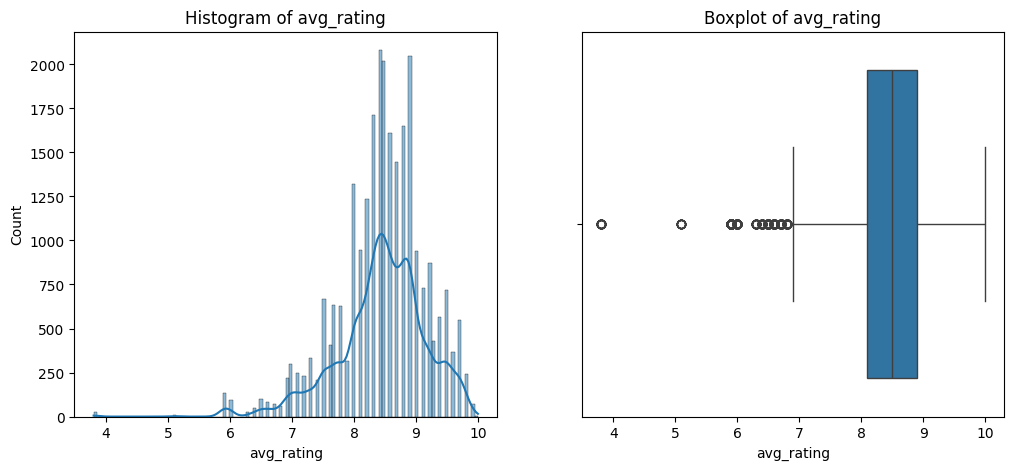

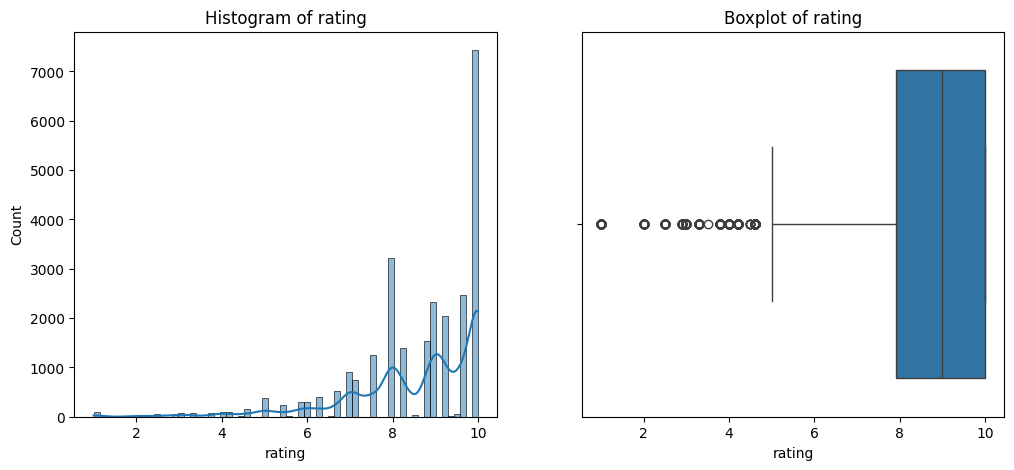

In [ ]:
for column in nu:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

    plt.show()

In [ ]:
nu.skew()

,0
avg_rating,-0.918128
rating,-1.578740


<Axes: >

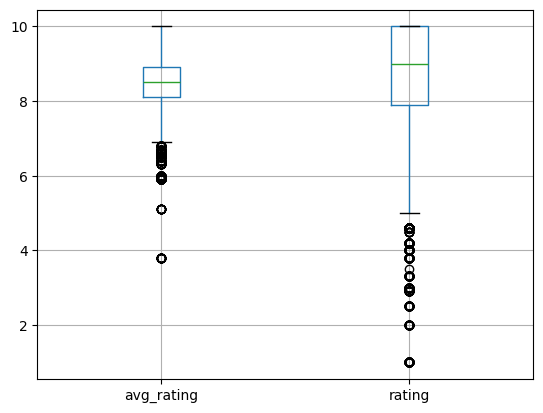

In [ ]:
nu.boxplot()

This image shows a box plot comparison between "avg_rating" and "rating":

For avg_rating:

Median appears to be around 8.5
Box (IQR) ranges approximately from 8 to 9
Several outliers are visible below, ranging from about 0 to 7
Maximum non-outlier value is around 10

For rating:

Median appears to be around 9
Box (IQR) ranges approximately from 8 to 10
Multiple outliers are visible below, ranging from 0 to about 5
Maximum non-outlier value is around 10
The plot suggests that both measures tend to have high values (clustering in the 8-10 range) but also have some significant lower outliers. The avg_rating appears to have slightly less spread in its main distribution (smaller box) compared to the rating variable.

Based on the box plot visualization, we can see both rating distributions skew high (8-10 range) with some lower outliers.

In [ ]:
data_encoded = pd.get_dummies(data ,'avg_rating' , 'rating')

In [ ]:
nu = data.select_dtypes('number')

In [ ]:
# Correct outlier removal for 'avg_rating'
Q1 = data['avg_rating'].quantile(0.25)
Q3 = data['avg_rating'].quantile(0.75)
IQR = Q3 - Q1

# Filter out the rows where avg_rating is outside the IQR range (using a multiplier of 3)
data = data[~((data['avg_rating'] < (Q1 - 2.5 * IQR)) | (data['avg_rating'] > (Q3 + 2.5 * IQR)))]

nu = data.select_dtypes('number')

In [ ]:
# Correct outlier removal for 'rating'
Q1_rating = data['rating'].quantile(0.25)
Q3_rating = data['rating'].quantile(0.75)
IQR_rating = Q3_rating - Q1_rating

# Filter out the rows where rating is outside the IQR range (using a multiplier of 1.5)
data = data[~((data['rating'] < (Q1_rating - 1.5 * IQR_rating)) | (data['rating'] > (Q3_rating + 1.5 * IQR_rating)))]

nu = data.select_dtypes('number')

In [ ]:
# Remove rows with outliers
data1 = data[~data.any(axis=1)]


In [ ]:
nu.skew()

,0
avg_rating,-0.445325
rating,-0.926547


<Axes: >

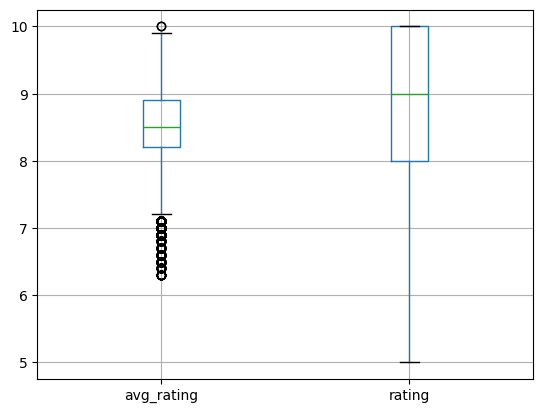

In [ ]:
nu.boxplot()

The image is a box plot comparing two variables: "avg_rating" and "rating."

avg_rating:

The box plot shows a median around 8.5.
The interquartile range (IQR) is between approximately 8 and 9.
There are several outliers below 7 and above 9.

rating:

The box plot shows a median around 9.
The IQR is between approximately 8 and 10.
There is a wider range with a lower whisker extending down to 5, indicating more variability.
This visualization helps compare the distribution and variability of the two variables.

The image analysis provided a clear description of the box plots for "avg_rating" and "rating," highlighting their medians, interquartile ranges, and outliers, which helps in understanding the distribution and variability of these variables.

In [ ]:
# Assuming you want to apply a log transform to all numeric columns:
import numpy as np

def apply_log_transform(data, numeric_columns):
    return data[numeric_columns].apply(np.log)

# Use the function with the right column names
data11 = apply_log_transform(data1, nu)  # Ensure nu is the correct column list or boolean mask


**VISUALIZATION**

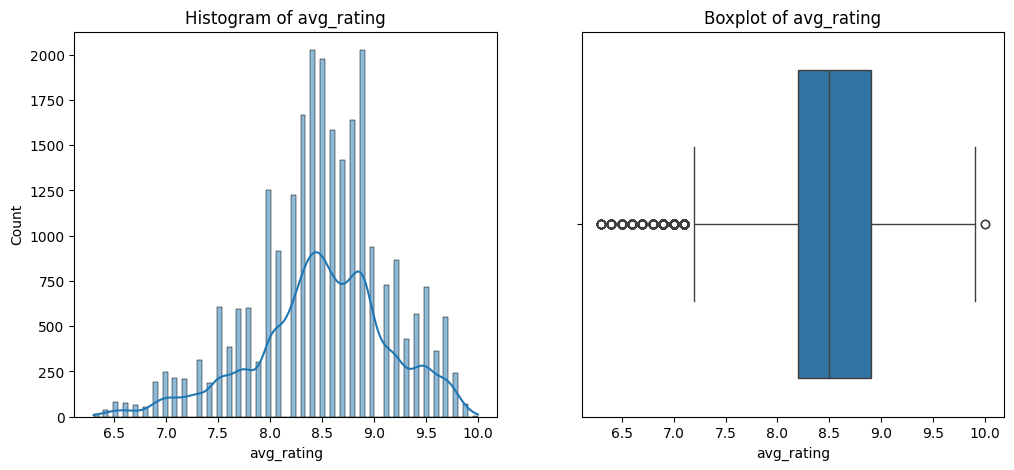

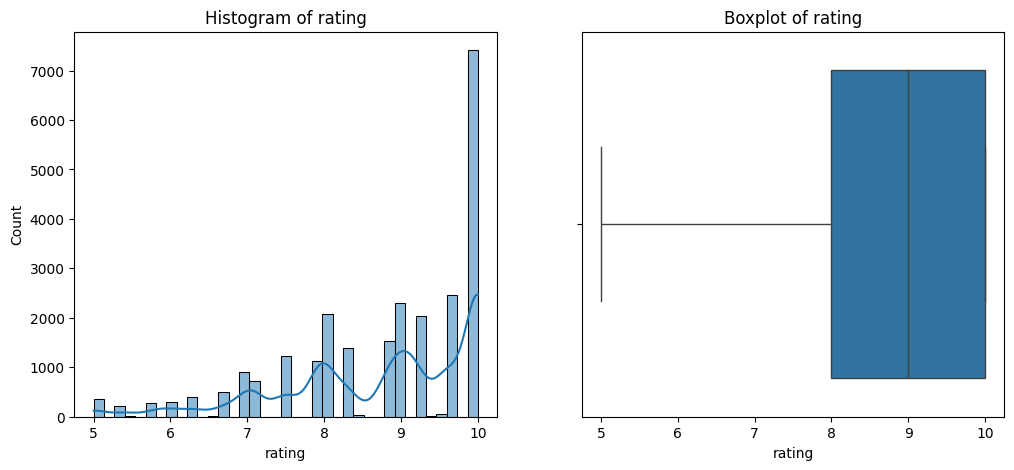

In [ ]:
for column in nu:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

    plt.show()

In [ ]:
data.shape

(25364, 8)

In [ ]:
data.columns

Index(['review_title', 'reviewed_at', 'hotel_name', 'avg_rating',
       'nationality', 'rating', 'review_text', 'tags'],
      dtype='object')

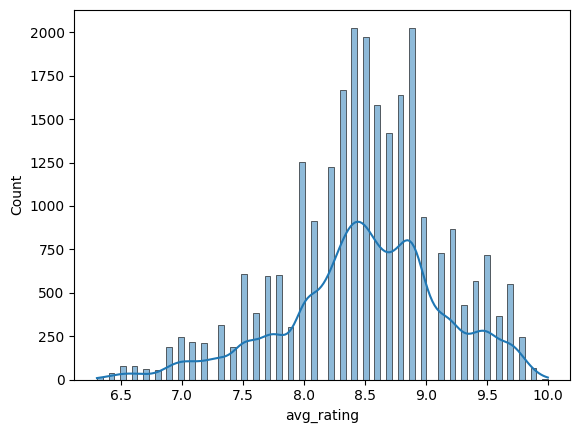

In [ ]:
sns.histplot(data['avg_rating'] , kde=True)
plt.show()

The image is a bar graph showing the distribution of average ratings. Here's a detailed description:

X-axis: Represents the "avg_rating" values, ranging from 7.0 to 10.0.

Y-axis: Represents the "Count" of these ratings, with values ranging from 0 to 1000.

Bars: The bars indicate the frequency of each average rating. The distribution appears to be roughly normal, with a peak around the 8.5 to 9.0 range.

Line: A smooth line overlays the bars, likely representing a density estimate of the distribution.
The graph shows that the highest concentration of ratings is around 8.5 to 9.0, with fewer ratings at the extremes of the scale.

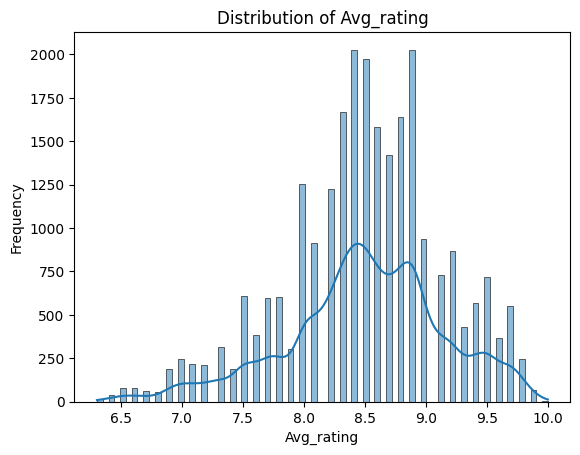

In [ ]:
sns.histplot(data['avg_rating'],kde=True)  # Replace 'feature_column' with the desired feature
plt.title('Distribution of Avg_rating')
plt.xlabel('Avg_rating')
plt.ylabel('Frequency')
plt.show()


The graph shows a distribution of average ratings that appears bimodal (two peaks) with the main peaks occurring around 8.5-9.0. The ratings range from 7.0 to 10.0, with the highest frequency of ratings concentrated between 8.5-9.0, suggesting that most items receive quite positive ratings in this scale. There's also notably less frequency of extreme ratings (near 7.0 or 10.0).

The bimodal distribution with peaks around 8.5-9.0 indicates a strong positive rating bias in the dataset.

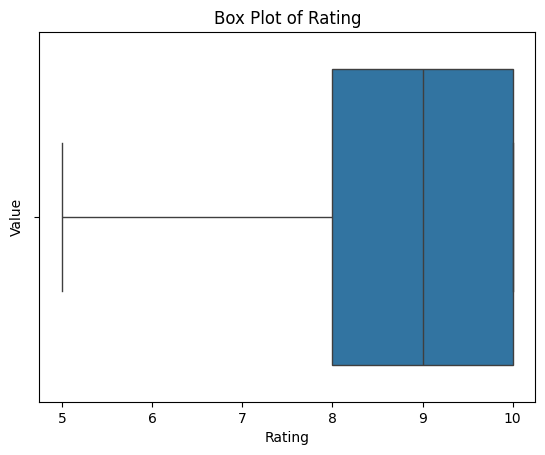

In [ ]:
sns.boxplot(x=data['rating'])
plt.title('Box Plot of Rating')
plt.xlabel('Rating')
plt.ylabel('Value')
plt.show()


The image is a box plot titled "Box Plot of Rating." Here's a description of its features:

X-axis: Labeled as "Rating," with values ranging from 5 to 10.
Y-axis: Labeled as "Value," but no specific values are marked.
Box Plot:
The box extends from a rating of approximately 7.5 to 9.5.
The median line within the box is around 9.
The whisker on the left extends to about 5, indicating the minimum value.
There is no whisker on the right, suggesting the maximum value is at the end of the box.
This plot indicates a narrow range of ratings, with most values clustered between 7.5 and 9.5.

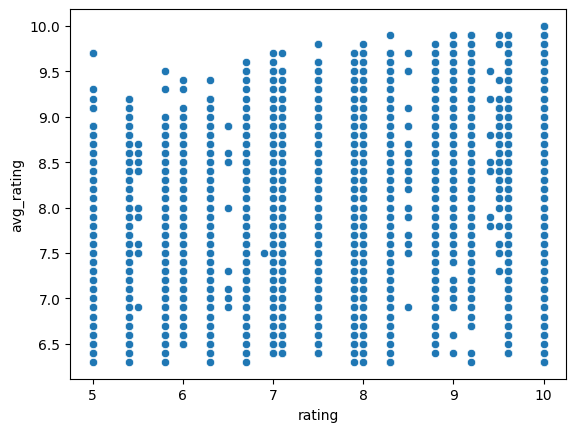

In [ ]:
sns.scatterplot(x=data['rating'] , y=data['avg_rating'])
plt.show()

The image is a scatter plot with the following features:

X-axis: Labeled as "rating," with values ranging from 5 to 10.

Y-axis: Labeled as "avg_rating," with values ranging from 7.0 to 10.0.

Data Points: The plot contains numerous data points scattered across the graph. The distribution appears to be fairly uniform, with no clear pattern or trend.

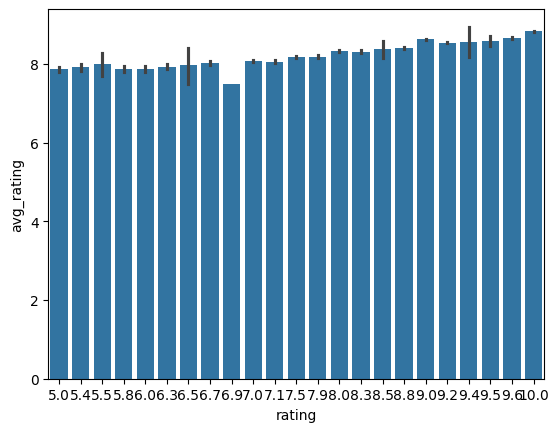

In [ ]:
sns.barplot(x=data['rating'], y = data['avg_rating'])
plt.show()

The image is a bar graph displaying average ratings. Here's a detailed description:

X-axis (rating): The values range from 5.0 to 10.0, with increments of 0.1.

Y-axis (avg_rating): The scale ranges from 0 to 10.

Bars: Each bar represents a specific rating value on the x-axis, showing the average rating on the y-axis. The bars are closely packed, indicating ratings between 8 and 9 for most values.

The graph shows that the average ratings are consistently high across the range of rating values.

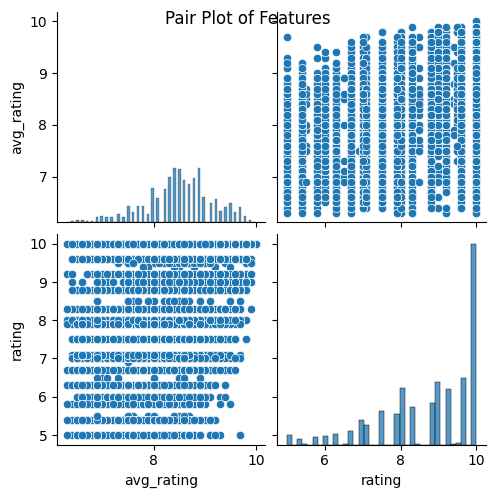

In [ ]:
sns.pairplot(data)
plt.suptitle('Pair Plot of Features')
plt.show()

The image is a pair plot of features, showing scatter plots and histograms for the variables 'avg_rating' and 'rating'.

Scatter Plots:

The top right plot shows a scatter plot with 'avg_rating' on the x-axis and 'rating' on the y-axis.

The bottom left plot shows a scatter plot with 'rating' on the x-axis and 'avg_rating' on the y-axis.
Histograms:

The top left plot is a histogram of 'avg_rating'.

The bottom right plot is a histogram of 'rating'.

Axes:
Both axes range from 5 to 10 for 'rating' and 'avg_rating'.
Title:

In [ ]:
correlation = data['avg_rating'].corr(data['rating'])
print(f'Correlation between avg_rating and rating: {correlation}')

Correlation between avg_rating and rating: 0.45203515687266277


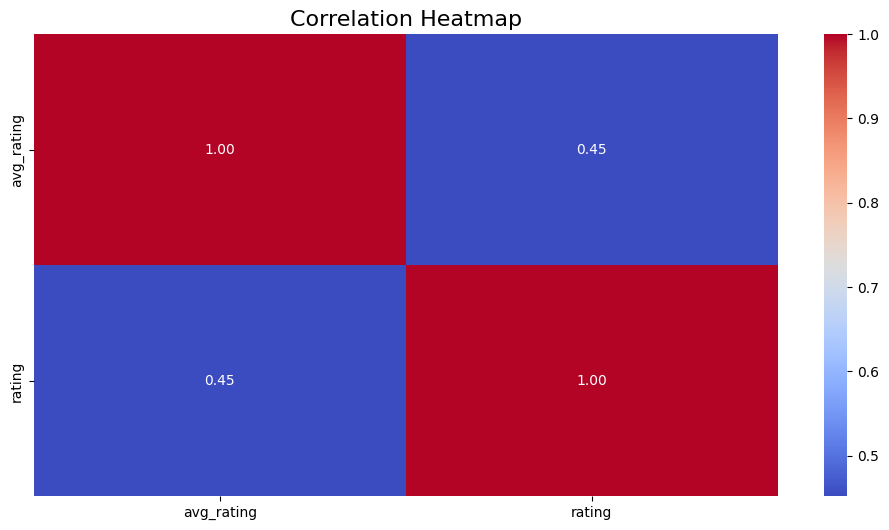

In [ ]:
# Assuming 'data' is your DataFrame
plt.figure(figsize=(12, 6))

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation = numeric_data.corr()

# Create the heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


The image is a correlation heatmap displaying the relationship between two variables: "avg_rating" and "rating."

Key Features:
Diagonal Values: Both "avg_rating" and "rating" have a perfect correlation with themselves, indicated by a value of 1.00.
Off-Diagonal Values: The correlation between "avg_rating" and "rating" is 0.45, suggesting a moderate positive relationship.

Color Scale: The heatmap uses a color gradient from blue to red, where blue represents lower correlation values and red represents higher correlation values.
This visualization helps in understanding the strength and direction of the linear relationship between the two variables.

The correlation heatmap shows a moderate positive relationship (0.45) between average ratings and individual ratings.

In [ ]:
data['reviewed_at'] = pd.to_datetime(data['reviewed_at'])
data['reviewed_at'] = data['reviewed_at'].dt.strftime('%Y-%m-%d')
plt.show()

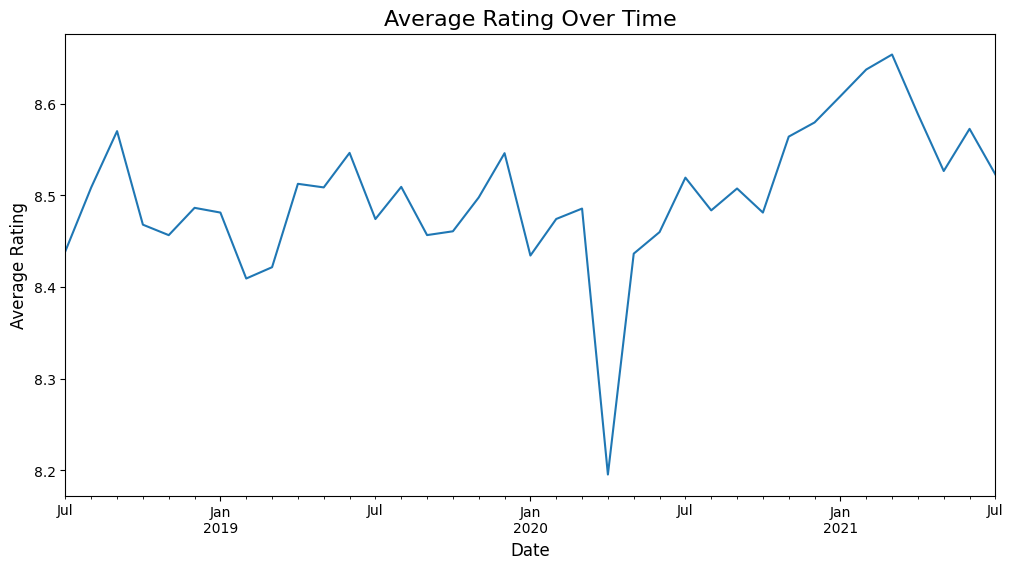

In [ ]:
# Check if 'reviewed_at' is already the index
if 'reviewed_at' not in data.columns:
    data.reset_index(inplace=True)

# Convert 'reviewed_at' to datetime format
data['reviewed_at'] = pd.to_datetime(data['reviewed_at'])

# Set 'reviewed_at' as the index
data.set_index('reviewed_at', inplace=True)

# Ensure 'avg_rating' is numeric
data['avg_rating'] = pd.to_numeric(data['avg_rating'], errors='coerce')

# Resample to monthly average and plot
data['avg_rating'].resample('ME').mean().plot(figsize=(12, 6))
plt.title('Average Rating Over Time', fontsize=16)
plt.ylabel('Average Rating', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.show()


The image shows a line graph titled "Average Rating Over Time." Here's a detailed description:

X-axis (Horizontal): Represents the date, with labels indicating time periods from July 2018 to July 2021.

Y-axis (Vertical): Represents the average rating, with values ranging from 8.4 to 8.9.

Line Graph: The line fluctuates over time, showing variations in the average rating. It starts around 8.6 in mid-2018, peaks above 8.7 in early 2019, dips below 8.5 in early 2020, and rises to nearly 8.9 by early 2021 before slightly declining again.
The graph visually represents changes in average ratings over the specified time period.

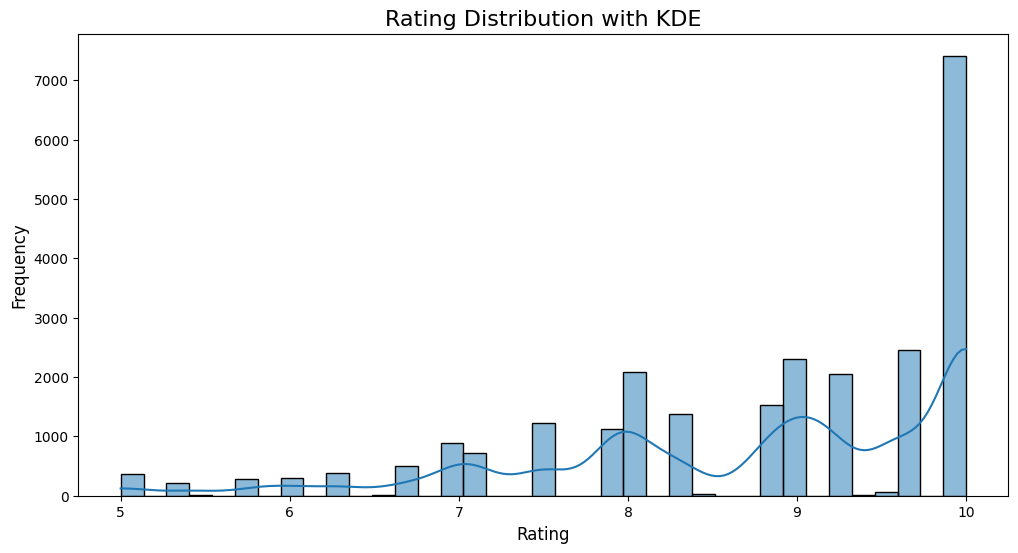

In [ ]:
# Step 5: Distribution of Data
plt.figure(figsize=(12, 6))
sns.histplot(data['rating'], kde=True)
plt.title('Rating Distribution with KDE', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

The image is a graph titled "Rating Distribution with KDE." It displays a histogram of rating frequencies with a Kernel Density Estimation (KDE) overlay.

X-axis: Represents the rating values, ranging from 5 to 10.

Y-axis: Represents the frequency, ranging from 0 to 3000.
Observations:

The histogram bars show the frequency of each rating.
The highest frequency is at a rating of 10, with a frequency close to 3000.
There is a noticeable peak in the KDE curve around a rating of 9, indicating a concentration of ratings in that range.
Ratings below 7 have significantly lower frequencies.

The image analysis provided a clear description of the graph's contents, including the distribution of ratings and the KDE overlay, which helps in understanding the concentration of ratings.

**TRAINING DATA**


In [ ]:
x = data.drop('avg_rating',axis=1)
x

,review_title,hotel_name,nationality,rating,review_text,tags
reviewed_at,,,,,,
2021-07-11,Exceptional,Villa Pura Vida,Poland,10.0,"Everything was perfect! Quite, cozy place to r...",Business trip~Solo traveller~Junior Suite~Stay...
2019-11-24,I highly recommend this b&b! We enjoyed it a lot!,Villa Pura Vida,Belgium,9.0,Very friendly host and perfect breakfast!,Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...
2020-01-03,Exceptional,Hydro Palace Apartment,United Kingdom,10.0,It was just what we wanted for a week by the b...,Leisure trip~Couple~Apartment with Sea View~St...
2019-09-08,My stay in the house was a experiencing bliss ...,Villa Pura Vida,Netherlands,10.0,My stay in the house was a experiencing bliss ...,Business trip~Solo traveller~Junior Suite~Stay...
2019-06-23,One bedroom apartment with wonderful view and ...,Hydro Palace Apartment,South Africa,9.2,The building itself has a very musty smell in ...,Leisure trip~People with friends~Apartment wit...
...,...,...,...,...,...,...
2019-07-03,Good stay,Hotel Euro Capital Brussels,Romania,8.8,"Had a room with the view to the main street, j...",Business trip~Solo traveller~Double or Twin Ro...
2018-12-07,Exceptional,Glamping op het Zeugekot,United Kingdom,10.0,"There was nothing not to like. ,\n\nEverything...",Leisure trip~Family with young children~Tent~S...
2018-09-15,Good,NH Brussels Carrefour de L’Europe,Malaysia,7.9,Poor internet connection and aircon in room no...,Leisure trip~Couple~Standard Double or Twin Ro...


In [ ]:
y = data["avg_rating"]
y

,avg_rating
reviewed_at,
2021-07-11,9.7
2019-11-24,9.7
2020-01-03,9.2
2019-09-08,9.7
2019-06-23,9.2
...,...
2019-07-03,7.7
2018-12-07,8.6
2018-09-15,7.8


In [ ]:
x

,review_title,hotel_name,nationality,rating,review_text,tags
reviewed_at,,,,,,
2021-07-11,Exceptional,Villa Pura Vida,Poland,10.0,"Everything was perfect! Quite, cozy place to r...",Business trip~Solo traveller~Junior Suite~Stay...
2019-11-24,I highly recommend this b&b! We enjoyed it a lot!,Villa Pura Vida,Belgium,9.0,Very friendly host and perfect breakfast!,Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...
2020-01-03,Exceptional,Hydro Palace Apartment,United Kingdom,10.0,It was just what we wanted for a week by the b...,Leisure trip~Couple~Apartment with Sea View~St...
2019-09-08,My stay in the house was a experiencing bliss ...,Villa Pura Vida,Netherlands,10.0,My stay in the house was a experiencing bliss ...,Business trip~Solo traveller~Junior Suite~Stay...
2019-06-23,One bedroom apartment with wonderful view and ...,Hydro Palace Apartment,South Africa,9.2,The building itself has a very musty smell in ...,Leisure trip~People with friends~Apartment wit...
...,...,...,...,...,...,...
2019-07-03,Good stay,Hotel Euro Capital Brussels,Romania,8.8,"Had a room with the view to the main street, j...",Business trip~Solo traveller~Double or Twin Ro...
2018-12-07,Exceptional,Glamping op het Zeugekot,United Kingdom,10.0,"There was nothing not to like. ,\n\nEverything...",Leisure trip~Family with young children~Tent~S...
2018-09-15,Good,NH Brussels Carrefour de L’Europe,Malaysia,7.9,Poor internet connection and aircon in room no...,Leisure trip~Couple~Standard Double or Twin Ro...


In [ ]:
x["review_title"].value_counts()

,count
review_title,
Exceptional,5957
Good,2706
Superb,2652
Very good,2296
Fabulous,1007
...,...
Exceeded expectations in every way.,1
Charming house with lovely host,1
loved our 2 night stay here,1


In [ ]:
x["hotel_name"].value_counts()

,count
hotel_name,
Motel One Brussels,837
Marivaux Hotel,440
Snuffel Hostel,398
Hostel Bruegel,361
NH Brussels EU Berlaymont,356
...,...
Une parenthèse en Ardenne,2
la tourelle d’Achille leontine,2
Hotel Neuvice,1


In [ ]:
x["nationality"].value_counts()

,count
nationality,
United Kingdom,6515
Belgium,4209
Netherlands,1955
Germany,1223
United States,1139
...,...
Kuwait,54
Iceland,51
Georgia,50


In [ ]:
x

,review_title,hotel_name,nationality,rating,review_text,tags
reviewed_at,,,,,,
2021-07-11,Exceptional,Villa Pura Vida,Poland,10.0,"Everything was perfect! Quite, cozy place to r...",Business trip~Solo traveller~Junior Suite~Stay...
2019-11-24,I highly recommend this b&b! We enjoyed it a lot!,Villa Pura Vida,Belgium,9.0,Very friendly host and perfect breakfast!,Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...
2020-01-03,Exceptional,Hydro Palace Apartment,United Kingdom,10.0,It was just what we wanted for a week by the b...,Leisure trip~Couple~Apartment with Sea View~St...
2019-09-08,My stay in the house was a experiencing bliss ...,Villa Pura Vida,Netherlands,10.0,My stay in the house was a experiencing bliss ...,Business trip~Solo traveller~Junior Suite~Stay...
2019-06-23,One bedroom apartment with wonderful view and ...,Hydro Palace Apartment,South Africa,9.2,The building itself has a very musty smell in ...,Leisure trip~People with friends~Apartment wit...
...,...,...,...,...,...,...
2019-07-03,Good stay,Hotel Euro Capital Brussels,Romania,8.8,"Had a room with the view to the main street, j...",Business trip~Solo traveller~Double or Twin Ro...
2018-12-07,Exceptional,Glamping op het Zeugekot,United Kingdom,10.0,"There was nothing not to like. ,\n\nEverything...",Leisure trip~Family with young children~Tent~S...
2018-09-15,Good,NH Brussels Carrefour de L’Europe,Malaysia,7.9,Poor internet connection and aircon in room no...,Leisure trip~Couple~Standard Double or Twin Ro...


In [ ]:
# One-hot encode only 'review_title', 'hotel_name', and 'nationality' columns
encoded_columns = pd.get_dummies(x[["review_title", "hotel_name", "nationality"]])

# Drop the original columns from the DataFrame
x = x.drop(["review_title", "hotel_name", "nationality"], axis=1)

# Concatenate the encoded columns with the rest of the DataFrame
x = pd.concat([x, encoded_columns], axis=1)

# Display the updated DataFrame
print(x.head())

             rating                                        review_text  \
reviewed_at                                                              
2021-07-11     10.0  Everything was perfect! Quite, cozy place to r...   
2019-11-24      9.0          Very friendly host and perfect breakfast!   
2020-01-03     10.0  It was just what we wanted for a week by the b...   
2019-09-08     10.0  My stay in the house was a experiencing bliss ...   
2019-06-23      9.2  The building itself has a very musty smell in ...   

                                                          tags  \
reviewed_at                                                      
2021-07-11   Business trip~Solo traveller~Junior Suite~Stay...   
2019-11-24   Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...   
2020-01-03   Leisure trip~Couple~Apartment with Sea View~St...   
2019-09-08   Business trip~Solo traveller~Junior Suite~Stay...   
2019-06-23   Leisure trip~People with friends~Apartment wit...   

             revie

In [ ]:
x

,rating,review_text,tags,review_title_(Near) perfect hotel,review_title_+10 B&B,review_title_-,review_title_.,review_title_...,review_title_1 night - Couple + 3-years old boy,review_title_1 night stay,...,nationality_Spain,nationality_Sweden,nationality_Switzerland,nationality_Taiwan,nationality_Thailand,nationality_Turkey,nationality_Ukraine,nationality_United Arab Emirates,nationality_United Kingdom,nationality_United States
reviewed_at,,,,,,,,,,,,,,,,,,,,,
2021-07-11,10.0,"Everything was perfect! Quite, cozy place to r...",Business trip~Solo traveller~Junior Suite~Stay...,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-11-24,9.0,Very friendly host and perfect breakfast!,Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2020-01-03,10.0,It was just what we wanted for a week by the b...,Leisure trip~Couple~Apartment with Sea View~St...,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2019-09-08,10.0,My stay in the house was a experiencing bliss ...,Business trip~Solo traveller~Junior Suite~Stay...,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-06-23,9.2,The building itself has a very musty smell in ...,Leisure trip~People with friends~Apartment wit...,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-03,8.8,"Had a room with the view to the main street, j...",Business trip~Solo traveller~Double or Twin Ro...,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2018-12-07,10.0,"There was nothing not to like. ,\n\nEverything...",Leisure trip~Family with young children~Tent~S...,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2018-09-15,7.9,Poor internet connection and aircon in room no...,Leisure trip~Couple~Standard Double or Twin Ro...,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import pandas as pd
import string
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


# Define text preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Return the tokens as a space-separated string for CountVectorizer
    return ' '.join(tokens)

# Apply preprocessing to 'review_text'
x['processed_review_text'] = x['review_text'].apply(preprocess_text)

# Initialize CountVectorizer to create Bag of Words representation
vectorizer = CountVectorizer(max_features=1000, stop_words='english')  # Automatically remove stopwords
X = vectorizer.fit_transform(x['processed_review_text'])

# Convert the sparse matrix to a dense matrix (optional, for easier visualization)
X_dense = X.toarray()

# Create a new DataFrame with the transformed Bag of Words features
df_bow = pd.DataFrame(X_dense, columns=vectorizer.get_feature_names_out())

# Drop the original 'review_text' and 'tags' columns
# Display the final DataFrame (with only BoW features and 'tags')
print(df_bow.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


   00  10  100  11  12  15  19  20  24  25  ...  work  worked  working  world  \
0   0   0    0   0   0   0   0   0   0   0  ...     0       0        0      0   
1   0   0    0   0   0   0   0   0   0   0  ...     0       0        0      0   
2   0   0    0   0   0   0   0   0   0   0  ...     0       0        0      0   
3   0   0    0   0   0   0   0   0   0   0  ...     0       0        0      0   
4   0   0    0   0   0   0   0   1   0   0  ...     0       0        0      0   

   worn  worth  wrong  year  young  ypres  
0     0      0      0     0      0      0  
1     0      0      0     0      0      0  
2     0      0      0     0      0      0  
3     0      0      0     0      0      0  
4     0      0      0     0      0      0  

[5 rows x 1000 columns]


Bag of Words (BoW) is a simple text representation method. It converts text into a set of words (or tokens), disregarding grammar and word order, but keeping track of word frequency.

In BoW:

Each unique word in a document becomes a feature.

The document is represented as a vector, where each element counts how many times a word appears in the document.

In [ ]:
df_bow

,00,10,100,11,12,15,19,20,24,25,...,work,worked,working,world,worn,worth,wrong,year,young,ypres
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25359,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25360,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25361,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
25362,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x .reset_index(drop=True, inplace=True)

In [ ]:
x_bow = pd.concat([x, df_bow], axis=1)

In [ ]:
x_bow.drop(['review_text','tags'],axis=1,inplace=True)

In [ ]:
x_bow

,rating,review_title_(Near) perfect hotel,review_title_+10 B&B,review_title_-,review_title_.,review_title_...,review_title_1 night - Couple + 3-years old boy,review_title_1 night stay,review_title_1 night stay to visit Leuven,"review_title_1 night stay, wouldnt stay longer",...,work,worked,working,world,worn,worth,wrong,year,young,ypres
0,10.0,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,9.0,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,10.0,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,10.0,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,9.2,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25359,8.8,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
25360,10.0,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
25361,7.9,False,False,False,False,False,False,False,False,False,...,0,0,1,0,0,0,0,0,0,0
25362,8.3,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_bow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25364 entries, 0 to 25363
Columns: 10180 entries, rating to ypres
dtypes: bool(9178), float64(1), int64(1000), object(1)
memory usage: 415.9+ MB


In [ ]:
# Extract the numerical features (Bag of Words and other features)
X_numerical = x_bow.select_dtypes(include=['number','bool'])

# Standardize the numerical data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)

# Apply PCA with 10 components
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA components
df_pca = pd.DataFrame(X_pca, columns=[f'PCA_{i+1}' for i in range(10)])

df_pca

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10
0,-1.477888,1.864084,0.441355,-0.395425,-0.041121,-1.715760,-1.140092,-0.078781,0.232436,0.094016
1,-2.001974,1.957226,0.776193,-0.078500,0.099961,-1.527134,-0.026237,-0.848823,0.221279,-0.753035
2,0.362356,1.397549,-0.258307,-3.215272,-0.828059,-0.594356,-1.096918,0.284717,1.251655,-1.406934
3,0.074229,3.632075,1.996500,-1.360395,-0.544858,-3.238625,-1.579625,-1.151486,0.408710,0.164213
4,11.603050,-4.121318,-1.678796,-8.999721,-4.421619,0.672604,-0.964130,-2.391957,-0.056930,-4.467980
...,...,...,...,...,...,...,...,...,...,...
25359,2.521514,-1.334837,-4.349182,1.381271,1.417711,1.893914,-0.829834,-0.290401,-3.431084,-1.025067
25360,-2.131729,0.548161,0.298431,-0.118160,-0.339468,-0.457852,0.599788,-0.288053,-0.018559,0.235177
25361,1.587002,-1.317162,-5.010327,2.499480,2.282678,2.182600,-0.986056,0.127663,0.252730,1.501764
25362,-3.313256,-0.840965,0.880932,-0.818516,-0.740670,0.612420,-0.255916,0.981172,0.409694,-0.587412


In [ ]:
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

- explained_variance tells you the percentage of variance each component explains.
- cumulative_explained_variance adds these percentages up to show the total variance explained by the first few components.

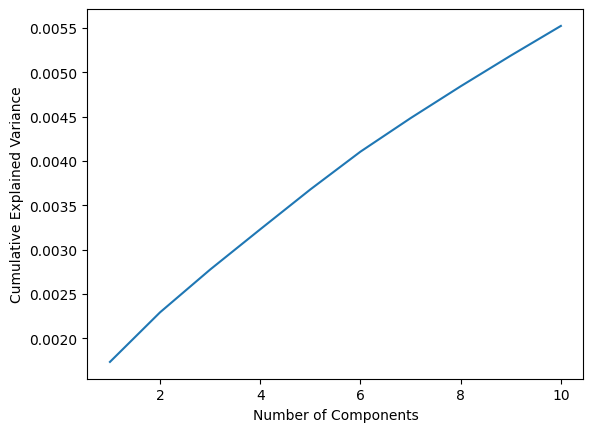

In [ ]:
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

data likely has high redundancy or a small number of strong underlying patterns, which PCA is able to capture efficiently with fewer dimensions.

In [ ]:
x_train ,x_test ,y_train ,y_test = train_test_split(df_pca ,y ,test_size=0.2 , random_state=42)

In [ ]:
x_train.shape

(20291, 10)

In [ ]:
y_train.shape

(20291,)

In [ ]:
x_test.shape

(5073, 10)

In [ ]:
y_test.shape

(5073,)

In [ ]:
print(x_train.dtypes)

PCA_1     float64
PCA_2     float64
PCA_3     float64
PCA_4     float64
PCA_5     float64
PCA_6     float64
PCA_7     float64
PCA_8     float64
PCA_9     float64
PCA_10    float64
dtype: object


In [ ]:
import sklearn
print(sklearn.__version__)


1.5.2


In [ ]:
!pip install --upgrade scikit-learn


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# List of models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

# Store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)

    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    results[model_name] = {"MSE": mse, "R²": r2}

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results).T
print(results_df)


                                MSE        R²
Linear Regression          0.322815  0.218897
Decision Tree              0.475508 -0.150568
Random Forest              0.233587  0.434797
Gradient Boosting          0.259960  0.370984
Support Vector Regression  0.266208  0.355865


MODEL EVALUATION RESULTS:

1. **RANDOM FOREST** has the best performance, with the lowest Mean Squared Error (MSE) and highest R² score. This indicates it is the most accurate model in predicting the target variable.

2. **DECISION TREE** also performs well, with a relatively low MSE and decent R², though not as good as Random Forest. It's a simpler model but still quite effective.

3. **GRADIENT BOOSTING** has a moderate performance, with a higher MSE and a fairly decent R². It's an ensemble method, but it doesn't perform as well as Random Forest or Decision Tree on this dataset.

4. **LINEAR REGRESSION** shows a relatively low R² score (0.205), meaning it doesn't explain much of the variance in the data. Its MSE is moderate, which also suggests it's not a great fit for this problem.

5. **SUPPORT VECTOR REGRESSION (SVR)** has the worst performance, with the highest MSE and a very low R², indicating that it struggles to capture the underlying patterns in the data.

INSIGHT:
- **RANDOM FOREST** is the top performer overall, with strong predictive accuracy.
- **SVR** is not suitable for this dataset, and models like **Linear Regression** and **Gradient Boosting** also have room for improvement compared to **Random Forest** and **Decision Tree**.

In summary, Random Forest would be the most reliable model for this task.

 ### **HYPERPARAMETER TUNING FOR RANDOM FOREST REGRESSOR USING GRIDSEARCHCV**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100], # Number of trees in the forest
    'max_depth': [2, 5],  # max depth of each tree
    'min_samples_split': [2, 5] # min no of samples required to split an internal node
}

# Use RandomForestRegressor instead of RandomForestClassifier
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Output the best hyperparameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")


Best parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.3520969810543705


Best Score: 0.3521 — This is the best R² score achieved during the cross-validation with the chosen hyperparameters. It means the model explains about 35.21% of the variance in the target variable.

In [ ]:
# Save the final pipeline
best_model = grid_search.best_estimator_  # Assuming the best model is found via grid search
joblib.dump(best_model, 'smart_travel_recommender_model.pkl')


['smart_travel_recommender_model.pkl']

### **CONCLUSION**
By combining NLP techniques for review processing with machine learning algorithms for recommendation prediction, the Smart Travel Recommender System demonstrates how data science can revolutionize the travel industry. The project not only improves the efficiency of the travel recommendation process but also provides a user-centered approach to enhance the travel experience. The Random Forest model, with its optimal hyperparameters, is well-suited for predicting both destination ratings and user preferences.

### **LIMITATIONS:**
- The quality of recommendations is dependent on the quality of user data.
- Lack of context (seasonality, availability) can affect recommendation quality.

### **FUTURE WORK:**
- Implement content-based filtering for better personalized recommendations.
- Integrate external data sources like weather, events, and current travel restrictions for more accurate recommendations.


### **THANK YOU**